In [163]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
import tensorflow as tf
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

# Import the k-Nearest Neighbors model from the sklearn library
from sklearn.neighbors import KNeighborsClassifier

# Import the train/test data split function from the sklearn library
from sklearn.model_selection import train_test_split

In [164]:
# Load data from csv file
df = pd.read_csv('CA_health_conditions.csv')

X = df[['Age', 'Sex (1=M, 2=F)', 'Beneficiary Race Code (1=White, 2=Black, 3=Others, 5=Hispanic)']]
y_true = df[['CC: Alzheimer or related disorders or senile (1=Y, 2=N)']]

display(X)
display(y_true)

,Age,"Sex (1=M, 2=F)","Beneficiary Race Code (1=White, 2=Black, 3=Others, 5=Hispanic)"
0,65,2,1
1,93,1,1
2,87,2,1
3,57,2,1
4,60,2,1
...,...,...,...
10219,77,2,3
10220,96,2,1
10221,89,2,1
10222,94,2,1


,"CC: Alzheimer or related disorders or senile (1=Y, 2=N)"
0,1
1,2
2,2
3,2
4,2
...,...
10219,2
10220,2
10221,2
10222,2


In [165]:
# Split into training set and testing set: test on 20% of the data so train on 80% of the data
X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size = 0.2)

       CC: Alzheimer or related disorders or senile (1=Y, 2=N)
8158                                                   2      
22                                                     2      
7923                                                   2      
6037                                                   2      
10088                                                  2      
...                                                  ...      
8118                                                   2      
9181                                                   2      
10186                                                  2      
5394                                                   2      
4855                                                   2      

[8179 rows x 1 columns]
[2 2 2 ... 2 2 2]


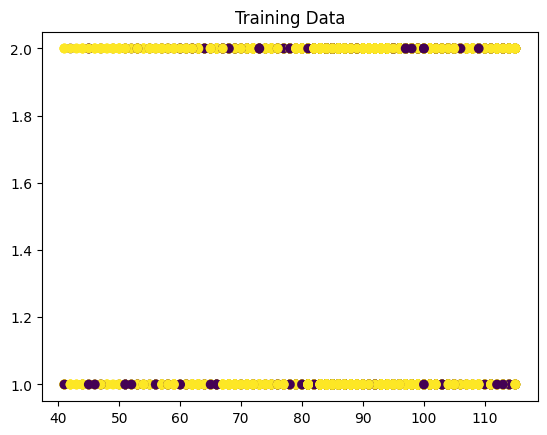

In [171]:
# Visualize the training data
print(y_train)
print(np.ravel(y_train.iloc[: ,0]))
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c = np.ravel(y_train.iloc[:, 0]), cmap = 'viridis')
plt.title('Training Data')
plt.show()

In [167]:
# Create KNN model
model = KNeighborsClassifier(n_neighbors = 30, weights = 'distance')

# Train the model on the training data
model.fit(X_train, np.ravel(y_train))

KNeighborsClassifier(n_neighbors=30, weights='distance')

In [168]:
# Predict the labels for the testing data
y_predict = model.predict(X_test)
print(y_predict)
print(y_test)

[2 2 2 ... 2 2 2]
      CC: Alzheimer or related disorders or senile (1=Y, 2=N)
9358                                                  2      
7733                                                  2      
4005                                                  2      
1826                                                  2      
5213                                                  1      
...                                                 ...      
1218                                                  2      
7576                                                  1      
7609                                                  2      
6675                                                  2      
3739                                                  2      

[2045 rows x 1 columns]


In [169]:
# Calculate accuracy of model
score = model.score(X_test, y_test)
print(score) # A value of 1 means "perfect"

0.7882640586797066
